## Visualizing CHIRPS Example Data for Ethiopia

In [1]:
import rasterio
from rasterio.plot import show
import requests
import matplotlib.pyplot as plt
import numpy as np

We can obtain the CHIRPS data for Ethiopia with the following request.

Options for `_type` are `['mm_data','mm_anomaly','none_z-score']`.

The `data` is the CHIRPS estimates of precipitation. The `anomalies` are the data value minus the mean of the entire time series up to the previous year. `Z-scores` are the Standardized Precipitation Indexes ([SPI](https://climatedataguide.ucar.edu/climate-data/standardized-precipitation-index-spi)) of the estimates.

Dekad is a zero padded value for the dekad of the year, 01-36 (a 10 day period)

In [64]:
dekad = '10'
year = 2019
_type = 'mm_data'

url = f"http://chg-ewxtest.chg.ucsb.edu/proxies/wcsProxy.php?layerNameToUse=chirps:"\
      f"chirps_africa_1-dekad-{dekad}-{year}_{_type}"\
      f"&lowerLeftXToUse=3673536.4017755133&lowerLeftYToUse=378978.68273536063&upperRightXToUse=5341797.050557815"\
      f"&upperRightYToUse=1676937.5016708253&wcsURLToUse=http://chg-ewxtest.chg.ucsb.edu:8080/geoserver/wcs?&resolution"\
      f"=0.05&srsToUse=EPSG:3857&outputSrsToUse=EPSG:4326"

In [60]:
data = requests.get(url)

with open("ethiopia.tiff", "wb") as f:
    f.write(data.content)

Now we can read this data into to `rasterio`:

In [46]:
d = rasterio.open('ethiopia.tiff')

In [47]:
print('width: ', d.width, ', height: ', d.height)

width:  300 , height:  234


In [48]:
print(d.bounds)

BoundingBox(left=32.99993896484375, bottom=3.4024219512939293, right=47.98617935180665, top=14.893569946289054)


In [49]:
print(d.meta)

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': None, 'width': 300, 'height': 234, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.04995413462320966, 0.0, 32.99993896484375,
       0.0, -0.049107470064081726, 14.893569946289054)}


In [50]:
array = d.read(1, masked=True)

`-9999.0` is the value set for the ocean (missing data) so we should set this to `NaN`

In [51]:
array[array==-9999.0] = np.nan

Now we are ready to visualize the data:

Text(0.5, 1.0, 'CHIRPS Ethiopia')

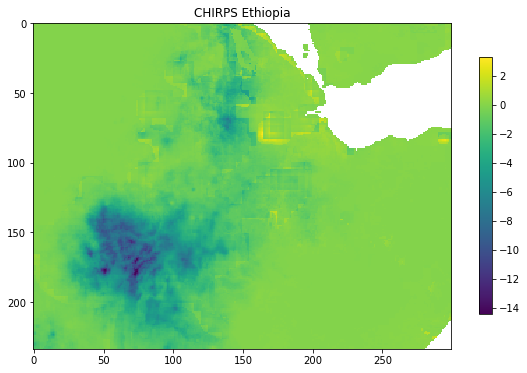

In [52]:
fig, ax = plt.subplots(figsize = (10,6))
chm_plot = ax.imshow(array, 
                     cmap='viridis')
fig.colorbar(chm_plot, fraction=.023, ax=ax)
ax.set_title(f"CHIRPS Ethiopia")